# TP 2
#### Para la imagen suministrada “metal grid”. Implementar un algoritmo que:
1. Calcule los gradientes en la imagen (dirección y módulo).
2. Muestre imágenes de ángulo y módulo.
3. Marque con color las direcciones de gradientes más altos.

In [86]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Cálculo de Gradientes

In [87]:
# Función definida para el cálculo de gradientes
# Recibe como entreda una imagen GRAY
# Entrega como magnitud y el angulo del gradiente de la imagen

def img_gradient(img_gray):
    # Suavizado Gaussiano
    blur = cv.GaussianBlur(img_gray,(5,5),0)
    
    # Gradientes
    # Se aplica Sobel en eje x en 'float32' y luego se lo convierte a de nuevo a 8-bit para evitar overflow
    sobelx_64 = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3)
    absx_64 = np.absolute(sobelx_64)
    sobelx_8u1 = absx_64/absx_64.max()*255
    sobelx_8u = np.uint8(sobelx_8u1)
    
    # Se aplica Sobel en eje y en 'float32' y luego se lo convierte a de nuevo a 8-bit para evitar overflow
    sobely_64 = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3)
    absy_64 = np.absolute(sobely_64)
    sobely_8u1 = absy_64/absy_64.max()*255
    sobely_8u = np.uint8(sobely_8u1)

    # Cálculo de la magnitud de los gradientes y escalado a uint8
    mag = np.hypot(sobelx_8u, sobely_8u)
    mag = mag/mag.max()*255
    mag = np.uint8(mag)

    # Cálculo de la dirección de los gradientes y pasaje a grados
    theta = np.arctan2(sobely_64, sobelx_64)
    angle = np.rad2deg(theta)
    return mag, angle


def gradient_angle_detector(img, central_angle = 30, rage_angle = 60, gradient_mag_threeshold = 100, color = (255,0,0)):
    img_gray = cv.cvtColor(img_BGR,cv.COLOR_BGR2GRAY)
    mag, angle = img_gradient(img_gray)
    init_angle = central_angle - rage_angle/2
    end_angle = central_angle + rage_angle/2
    
    angle_mask = (angle >= init_angle) & (angle <= end_angle) 
    mag_mask = mag >= gradient_mag_threeshold
    img[angle_mask & mag_mask] = color
    return img

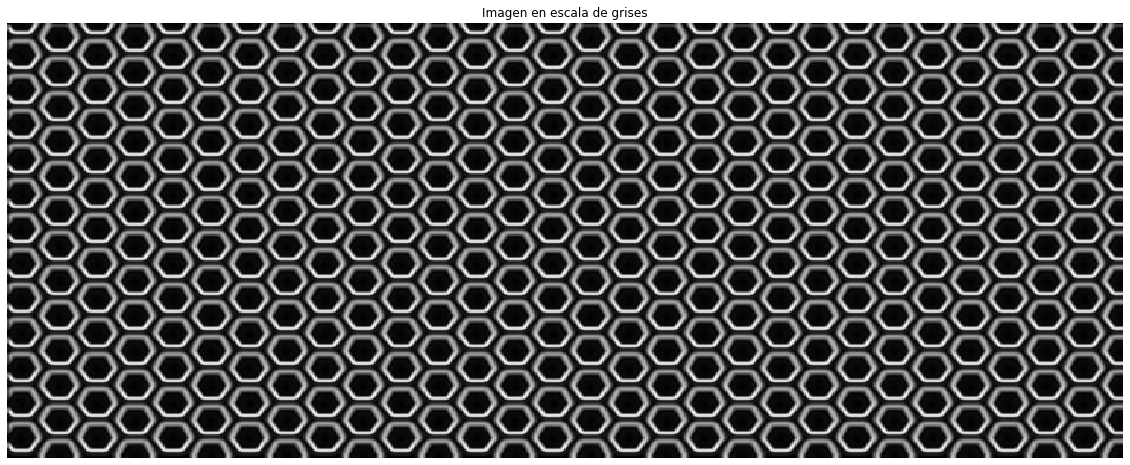

In [88]:
img_BGR = cv.imread('metalgrid.jpg',cv.IMREAD_COLOR)
img_RGB = cv.cvtColor(img_BGR,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_BGR,cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 1, figsize=(20,8)) 
ax.imshow(mag,aspect='auto', cmap='gray', vmin=0, vmax=255.0)
ax.set_title("Imagen en escala de grises")
ax.axis('off')
plt.show()
fig.savefig('img_gray.jpg') 

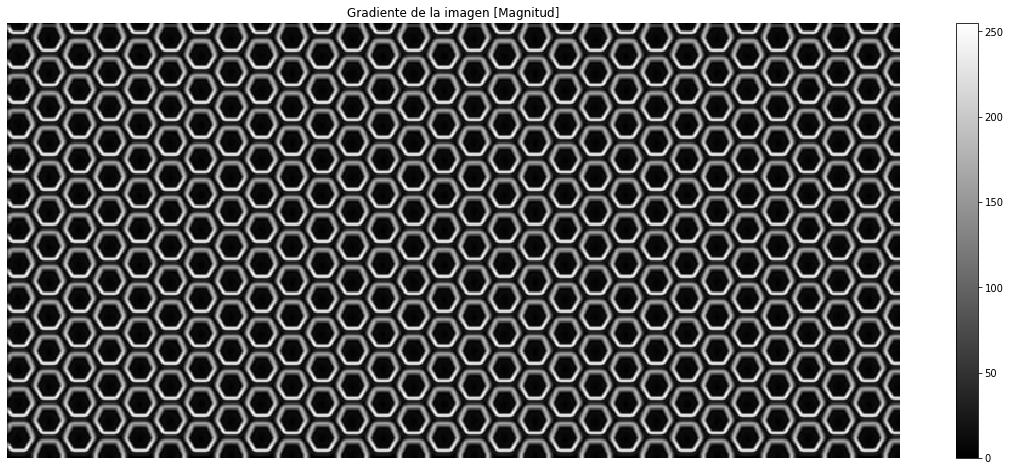

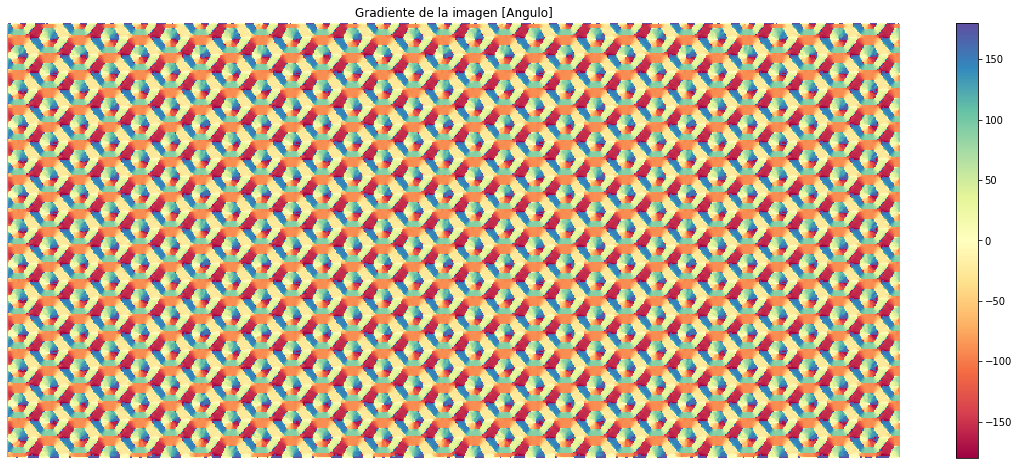

In [89]:
mag, angle = img_gradient(img_gray)

fig, ax = plt.subplots(1, 1, figsize=(20,8)) 
im0 = ax.imshow(mag,aspect='auto', cmap='gray', vmin=0, vmax=255.0)
ax.set_title("Gradiente de la imagen [Magnitud]")
ax.axis('off')
plt.colorbar(im0)
plt.show()
fig.savefig('img_gradients_mag.jpg') 

fig, ax = plt.subplots(1, 1, figsize=(20,8)) 
im1 = ax.imshow(angle,aspect='auto', cmap='Spectral', vmin=-180.0, vmax=180.0)
ax.set_title("Gradiente de la imagen [Angulo]")
ax.axis('off')
plt.colorbar(im1)
plt.show()
fig.savefig('img_gradients_angle.jpg') 

### Representación gráfica de las direcciones de los principales gradientes

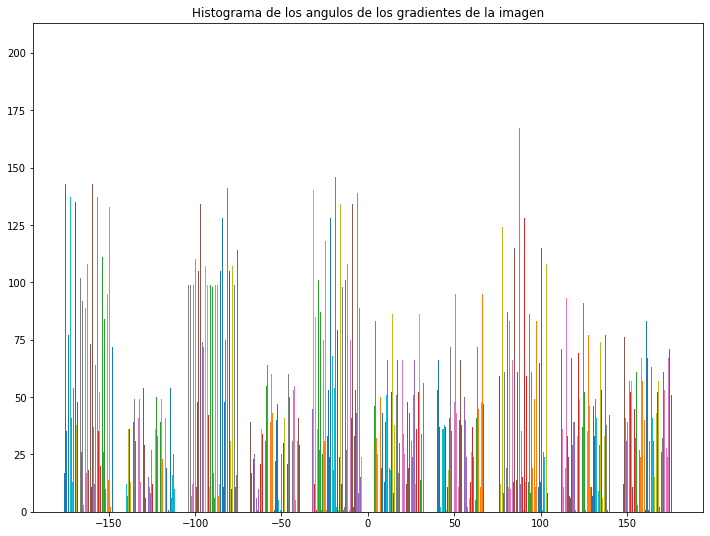

In [90]:
fig, ax = plt.subplots(1,figsize=(12,9))
ax.hist(angle)
ax.set_title("Histograma de los angulos de los gradientes de la imagen")
plt.show()

fig.savefig('img_gradients_angle_histogram.jpg') 

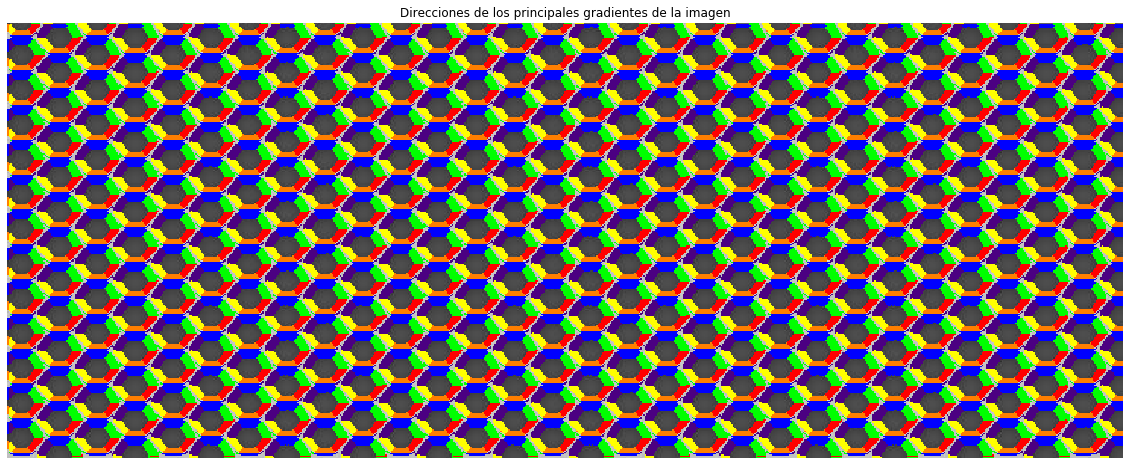

In [91]:
colors = np.zeros((6,3), dtype = int)
colors[0,:] = [255,0,0]
colors[1,:] = [255,127,0]
colors[2,:] = [255,255,0]
colors[3,:] = [0,255,0]
colors[4,:] = [0,0,255]
colors[5,:] = [75,0,130]

central_angle_array = np.array([30, 90, 150, -30, -90, -150])

img_grandient_angle_det = img_RGB.copy()

for i in range(central_angle_array.shape[0]):
    img_grandient_angle_det = gradient_angle_detector(img_grandient_angle_det, 
                                                        central_angle = central_angle_array[i], 
                                                        rage_angle = 60, 
                                                        gradient_mag_threeshold = 20, 
                                                        color = colors[i,:])

fig, ax = plt.subplots(1, 1, figsize=(20,8)) 
ax.set_title("Direcciones de los principales gradientes de la imagen")
ax.axis('off')
plt.imshow(img_grandient_angle_det,aspect='auto')
plt.show()
fig.savefig('main_gradients_angle.jpg') 